### Score: 76

Q1.[4+9+9]

Q2.[8]

Q3.[3+4+5+5+5+5+5+4+5+5]

Q4.[0+0+0]

In [2]:
import pandas as pd

# 替换为实际的文件路径
file_path = r'C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t')

# 显示前几行数据以确认读取成功
print(Sig_Eqs.head())

  Search Parameters      Id    Year  Mo  Dy  Hr  Mn  Sec  Tsu     Vol  ...  \
0                []     NaN     NaN NaN NaN NaN NaN  NaN  NaN     NaN  ...   
1               NaN     1.0 -2150.0 NaN NaN NaN NaN  NaN  NaN     NaN  ...   
2               NaN     2.0 -2000.0 NaN NaN NaN NaN  NaN  1.0     NaN  ...   
3               NaN     3.0 -2000.0 NaN NaN NaN NaN  NaN  NaN     NaN  ...   
4               NaN  5877.0 -1610.0 NaN NaN NaN NaN  NaN  3.0  1351.0  ...   

  Total Missing Total Missing Description  Total Injuries  \
0           NaN                       NaN             NaN   
1           NaN                       NaN             NaN   
2           NaN                       NaN             NaN   
3           NaN                       NaN             NaN   
4           NaN                       NaN             NaN   

  Total Injuries Description  Total Damage ($Mil)  Total Damage Description  \
0                        NaN                  NaN                       NaN   
1     

In [3]:
# 1.1
# 按国家分组并计算总死亡人数
# NOTE: 这里应该读取Total Deaths列 -1
deaths_by_country = Sig_Eqs.groupby('Location Name')['Deaths'].sum().sort_values(ascending=False)

# 打印前20个国家及其总死亡人数
print(deaths_by_country.head(20))

Location Name
CHINA:  SHAANXI PROVINCE                     830313.0
TURKEY:  ANTAKYA (ANTIOCH)                   474870.0
HAITI:  PORT-AU-PRINCE                       316000.0
IRAN:  TABRIZ                                268750.0
TURKEY:  ANTAKYA (ANTIOCH), SAMANDAG         250000.0
CHINA:  NE:  TANGSHAN                        242769.0
AZERBAIJAN:  GYZNDZHA                        230000.0
IRAN:  DAMGHAN, QUMIS                        200000.0
CHINA:  GANSU PROVINCE, SHANXI PROVINCE      200000.0
ARMENIA:  DVIN; IRAN:  ARDABIL               150000.0
JAPAN:  TOKYO, YOKOHAMA                      142809.0
CHINA:  GANSU PROVINCE                       137682.0
SYRIA:  ALEPPO                               130000.0
IRAQ:  AL-MAWSIL                             120000.0
TURKMENISTAN:  ASHKHABAD                     110000.0
CHINA:  SICHUAN PROVINCE                     107213.0
CHINA:  NEI MONGOL:  NINGCHENG               100000.0
PORTUGAL:  LISBON                             83311.0
SYRIA:  HALAB 

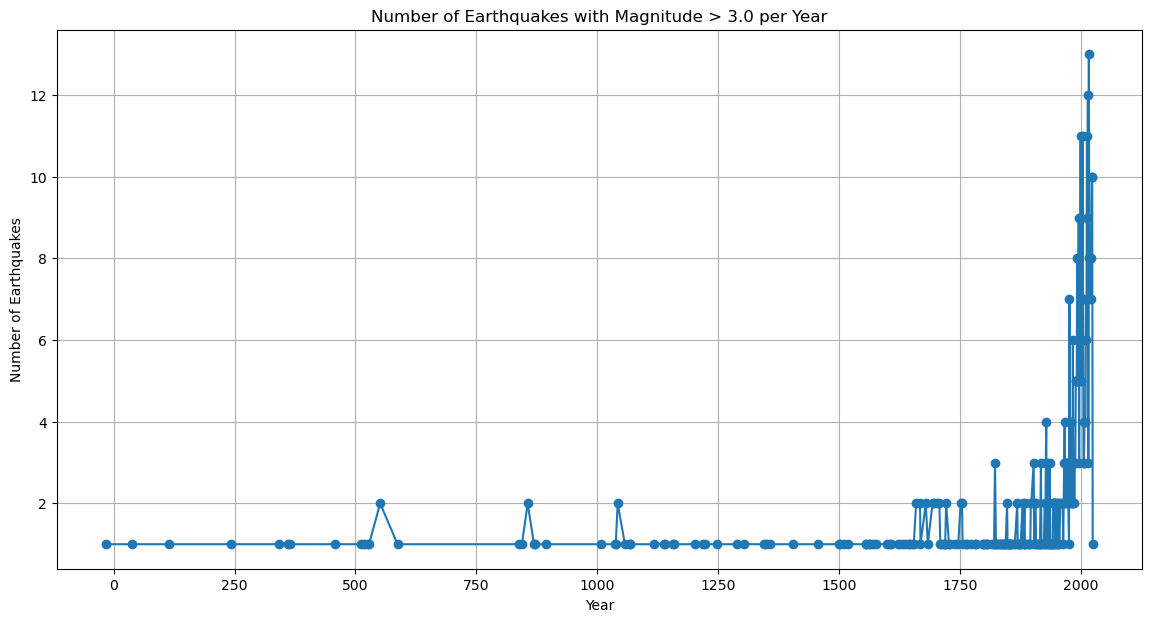

Trend Analysis:
There is no clear trend.


In [6]:
# 1.2
# 过滤震级大于3.0的地震
# NOTE: 这里应该使用Ms或者Mag列 -1
filtered_eqs = Sig_Eqs[Sig_Eqs['Damage Description'] > 3.0]

# 将年份列转换为整数类型
#filtered_eqs['Year'] = filtered_eqs['Year'].astype(int)

# 按年份分组并计算每年的地震数量
eqs_per_year = filtered_eqs.groupby('Year').size()

# 绘制时间序列图
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(eqs_per_year.index, eqs_per_year.values, marker='o')
plt.title('Number of Earthquakes with Magnitude > 3.0 per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.show()

# 分析趋势
print("Trend Analysis:")
if eqs_per_year.is_monotonic_increasing:
    print("There is a clear increasing trend.")
elif eqs_per_year.is_monotonic_decreasing:
    print("There is a clear decreasing trend.")
else:
    print("There is no clear trend.")

In [25]:
def CountEq_LargestEq(country):
    # 过滤数据以获取指定国家的地震记录
    country_data = Sig_Eqs[Sig_Eqs['Location Name'] == country]
    
    # 计算该国家的地震总数
    total_eqs = len(country_data)

    # NOTE: 在求最大值索引前需要先将所求列空值去除 -1
    country_data = country_data.dropna(subset=['Damage Description'])
    
    # 找到该国家的最大地震
    if not country_data.empty:
        largest_eq = country_data.loc[country_data['Damage Description'].idxmax()]
        largest_eq_date = largest_eq.get('Date', None)
        largest_eq_location = largest_eq.get('Location Name', None)
    else:
        largest_eq_date = None
        largest_eq_location = None
    
    return total_eqs, largest_eq_date, largest_eq_location

# 应用函数到每个国家并存储结果
results = []
for country in Sig_Eqs['Location Name'].unique():
    total_eqs, largest_eq_date, largest_eq_location = CountEq_LargestEq(country)
    results.append((country, total_eqs, largest_eq_date, largest_eq_location))

# 创建DataFrame来存储结果
results_df = pd.DataFrame(results, columns=['Location Name', 'Total Earthquakes', 'Largest Earthquake Date', 'Largest Earthquake Location'])

# 按地震总数降序排列结果
results_df = results_df.sort_values(by='Total Earthquakes', ascending=False)

# 打印结果
print(results_df)

                                   Location Name  Total Earthquakes  \
451                      CHINA:  YUNNAN PROVINCE                 68   
815                       RUSSIA:  KURIL ISLANDS                 53   
47                                        TURKEY                 47   
337                     CHINA:  SICHUAN PROVINCE                 46   
1786                             SOLOMON ISLANDS                 34   
...                                          ...                ...   
1546        INDONESIA:  SUMATERA:  BREUEH ISLAND                  1   
1547                           URUGUAY:  COLOGNE                  1   
1548                          CHINA:  BOHAI GULF                  1   
1549  NEW ZEALAND:  SOUTH ISLAND: AMURI DISTRICT                  1   
0                                            NaN                  0   

     Largest Earthquake Date                 Largest Earthquake Location  
451                     None                     CHINA:  YUNNAN PROVINCE

Data type of TMP column: float64


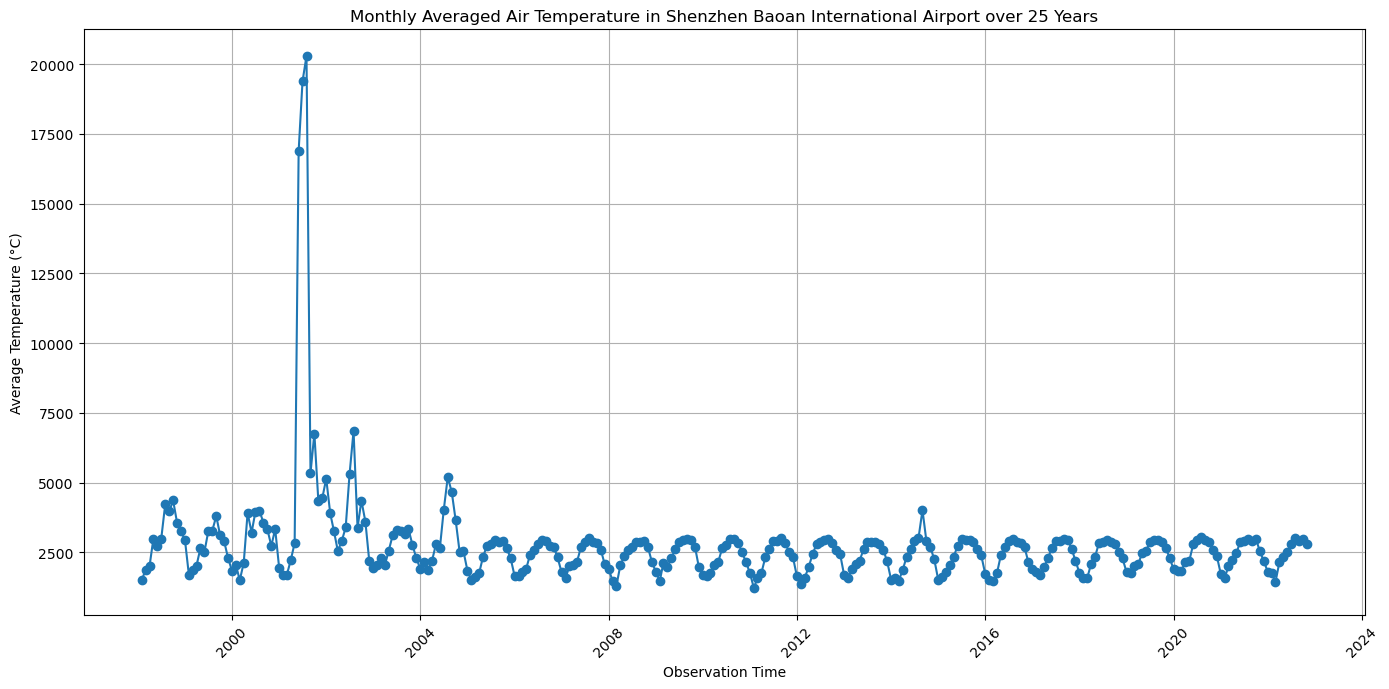

Trend Analysis:
There is no clear trend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Load the CSV file
file_path = r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv'
weather_data = pd.read_csv(file_path, low_memory=False)

# Step 2: Select relevant columns
relevant_columns = ['DATE', 'TMP']
weather_data = weather_data[relevant_columns]

# Step 3: Clean the data
# Define a function to clean the TMP column
def clean_tmp_value(value):
    # Remove non-numeric characters except for '.' and '-'
    cleaned_value = re.sub(r'[^\d.-]', '', value)
    try:
        # Try to convert to float
        return float(cleaned_value)
    except ValueError:
        # If conversion fails, return NaN
        return None

# Apply the cleaning function to the TMP column
# NOTE: 没有根据质量指标对数据进行筛选，且没有将温度除以10 -2
weather_data['TMP'] = weather_data['TMP'].apply(clean_tmp_value)

# Drop rows with missing values
weather_data.dropna(inplace=True)

# Ensure TMP column is float
weather_data['TMP'] = weather_data['TMP'].astype(float)

# Verify the data type of TMP column
print(f"Data type of TMP column: {weather_data['TMP'].dtype}")

# Convert DATE to datetime using ISO8601 format
weather_data['datetime'] = pd.to_datetime(weather_data['DATE'], format='ISO8601')

# Set datetime as the index
weather_data.set_index('datetime', inplace=True)

# Step 4: Calculate monthly average temperature using agg method
monthly_avg_temp = weather_data.resample('ME').agg({'TMP': 'mean'})

# Step 5: Plot the monthly averaged air temperature against observation time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp['TMP'], marker='o')
plt.title('Monthly Averaged Air Temperature in Shenzhen Baoan International Airport over 25 Years')
plt.xlabel('Observation Time')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for trends
print("Trend Analysis:")
if monthly_avg_temp['TMP'].is_monotonic_increasing:
    print("There is a clear increasing trend.")
elif monthly_avg_temp['TMP'].is_monotonic_decreasing:
    print("There is a clear decreasing trend.")
else:
    print("There is no clear trend.")

In [25]:
#3.1
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 # NOTE: 第二行是数据不能跳过 -1
                 skiprows=[1, 2],
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# NOTE: 缺少对WMO_WIND列数据的处理，以下两行为后加的对数据的处理 -1
df['WMO_WIND'] = df['WMO_WIND'].replace(' ', 0)
df['WMO_WIND'] =df['WMO_WIND'].astype(float)

# Group by SID and get the maximum WMO_WIND for each storm
grouped = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'}).reset_index()

# Sort by WMO_WIND in descending order and get the top 10
top_10_hurricanes = grouped.sort_values(by='WMO_WIND', ascending=False).head(10)

print(top_10_hurricanes)

                 SID      NAME  WMO_WIND
12921  2015293N13266  PATRICIA     185.0
9087   1980214N11330     ALLEN     165.0
11067  1997253N12255     LINDA     160.0
11944  2005289N18282     WILMA     160.0
13307  2019236N10314    DORIAN     160.0
10011  1988253N12306   GILBERT     160.0
4105   1935241N23291      None     160.0
11190  1998295N12284     MITCH     155.0
13098  2017242N16333      IRMA     155.0
12337  2009288N07267      RICK     155.0


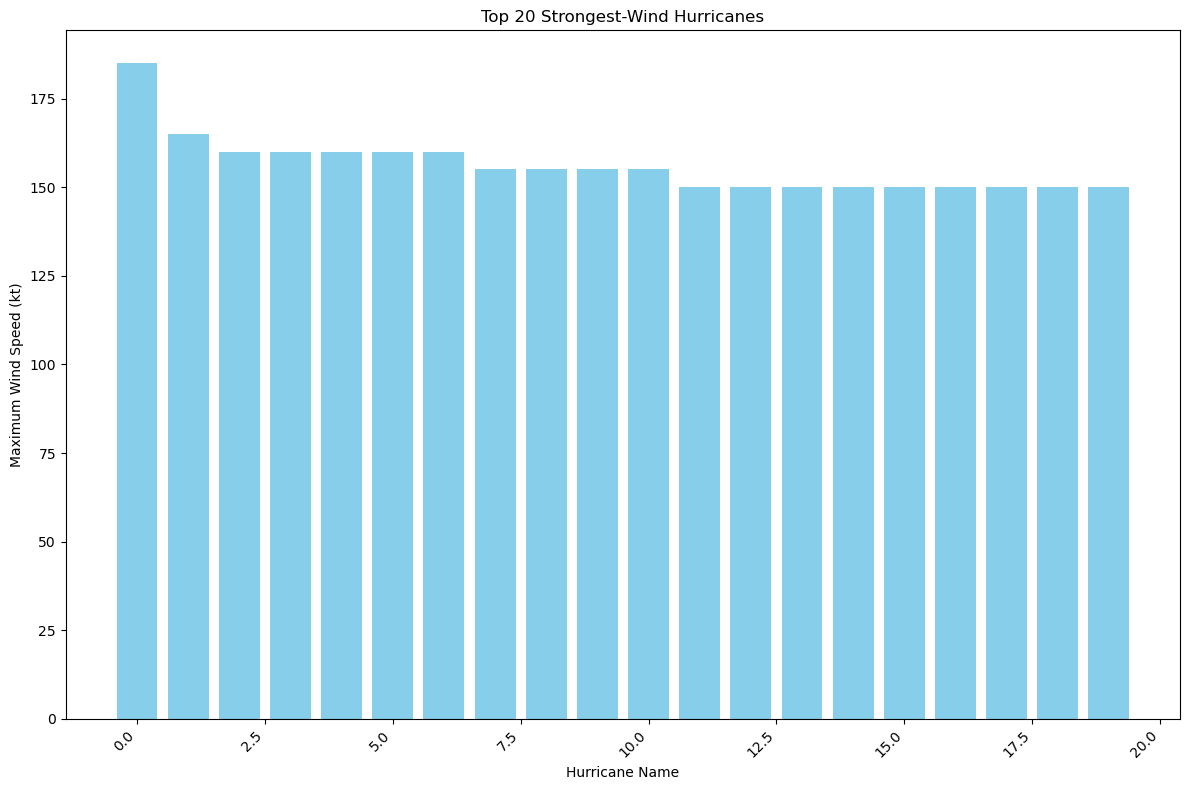

In [26]:
#3.2
import matplotlib.pyplot as plt

# Get the top 20 hurricanes
top_20_hurricanes = grouped.sort_values(by='WMO_WIND', ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(12, 8))
# NOTE: NAME列中含有空值报错，3.1中未处理WMO_WIND数据导致成图空白 -1
# plt.bar(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='skyblue')
plt.bar(range(len(top_20_hurricanes['WMO_WIND'])), top_20_hurricanes['WMO_WIND'], color='skyblue')
plt.xlabel('Hurricane Name')
plt.ylabel('Maximum Wind Speed (kt)')
plt.title('Top 20 Strongest-Wind Hurricanes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

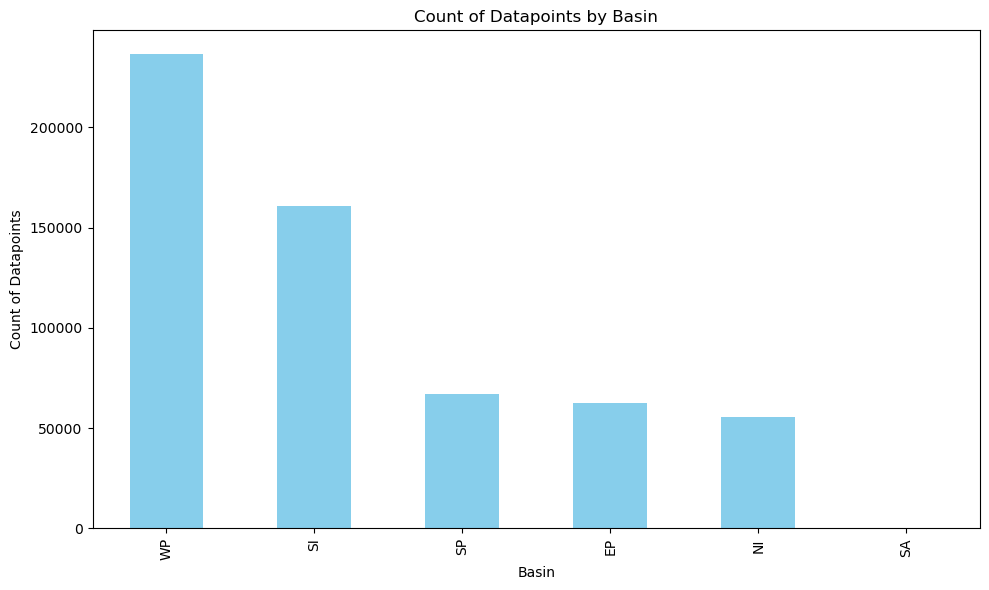

In [27]:
#3.3
# Count the number of datapoints by Basin
basin_counts = df['BASIN'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
basin_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Basin')
plt.ylabel('Count of Datapoints')
plt.title('Count of Datapoints by Basin')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

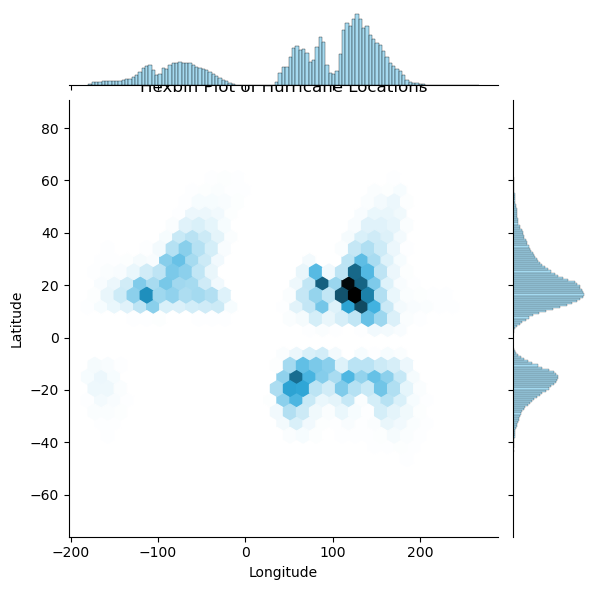

In [28]:
#3.4
import seaborn as sns

# Create a hexbin plot
plt.figure(figsize=(12, 8))
sns.jointplot(x=df['LON'], y=df['LAT'], kind='hex', gridsize=30, color='skyblue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Hurricane Locations')
plt.show()

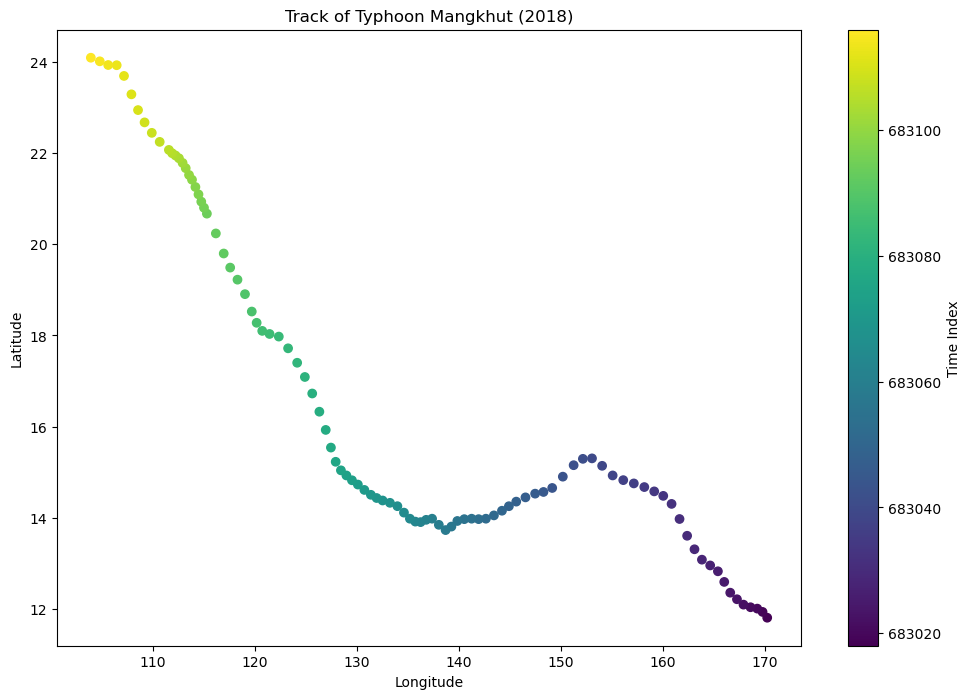

In [29]:
#3.5
# Filter the data for Typhoon Mangkhut in 2018
mangkhut = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)]

# Plot the track
plt.figure(figsize=(12, 8))
plt.scatter(mangkhut['LON'], mangkhut['LAT'], c=mangkhut.index, cmap='viridis')
plt.colorbar(label='Time Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.show()

In [30]:
#3.6
# Filter the data
filtered_df = df[(df['BASIN'].isin(['WP', 'EP'])) & (df['SEASON'] >= 1970)]

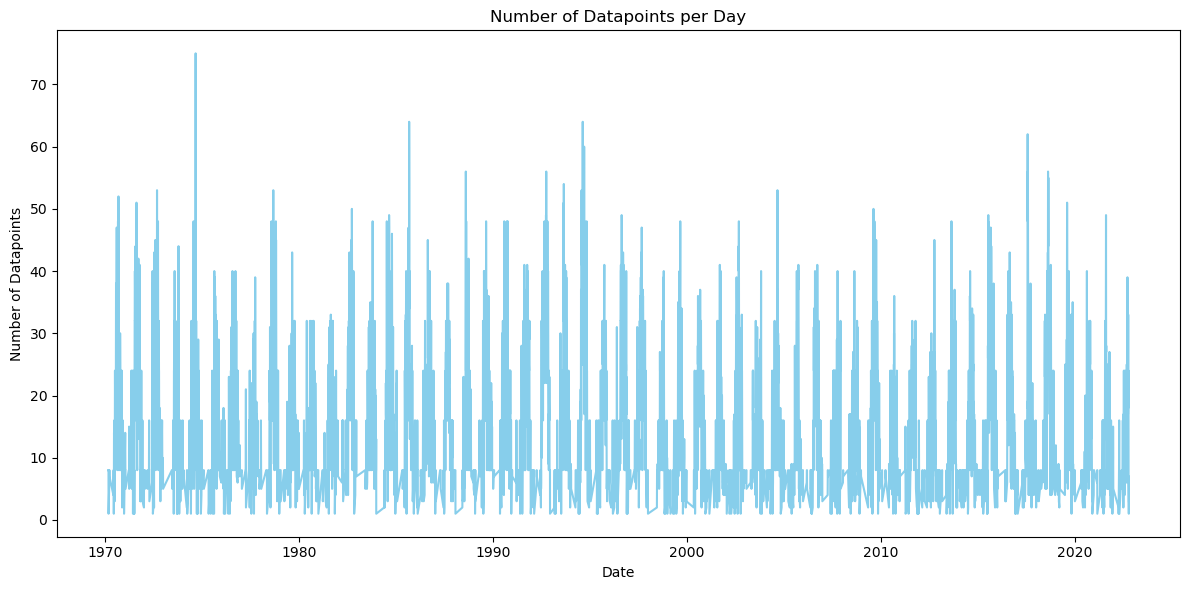

In [31]:
#3.7
# Group by date and count the number of datapoints
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# Plot the number of datapoints per day
plt.figure(figsize=(12, 6))
daily_counts.plot(color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints per Day')
plt.tight_layout()
plt.show()

C:\Users\zjm\AppData\Local\Temp\ipykernel_8624\1587969075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear


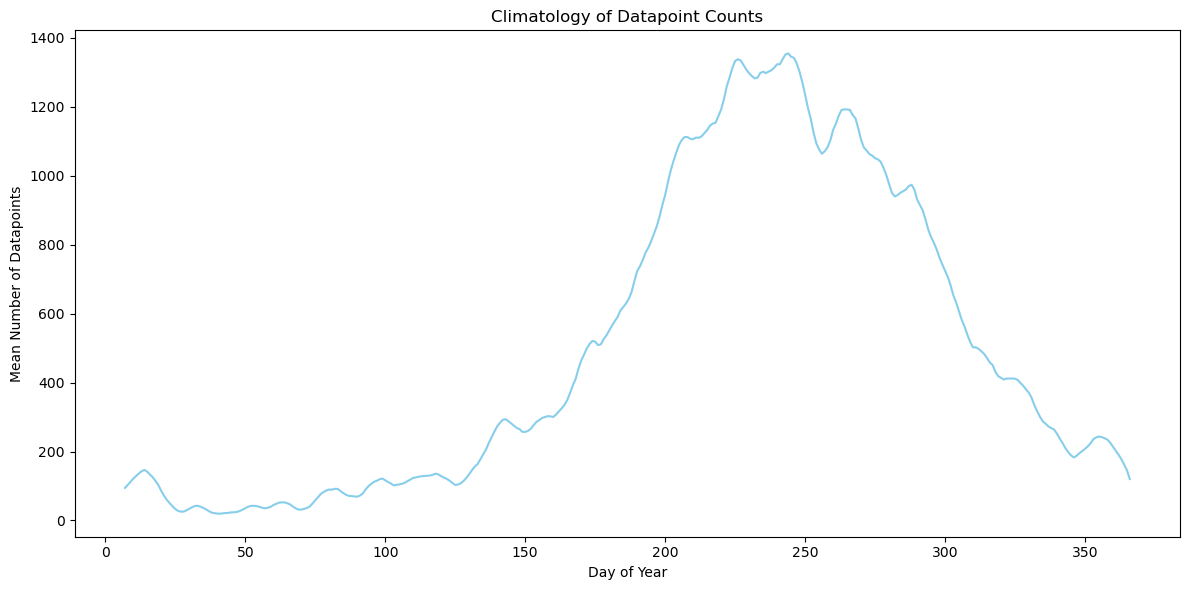

In [32]:
#3.8
# Extract the day of the year using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'DAY_OF_YEAR'] = filtered_df['ISO_TIME'].dt.dayofyear

# Group by day of the year and calculate the mean count
# NOTE: 计算气候态方法错误 -1
climatology = filtered_df.groupby('DAY_OF_YEAR').size().rolling(window=7).mean()

# Plot the climatology
plt.figure(figsize=(12, 6))
climatology.plot(color='skyblue')
plt.xlabel('Day of Year')
plt.ylabel('Mean Number of Datapoints')
plt.title('Climatology of Datapoint Counts')
plt.tight_layout()
plt.show()

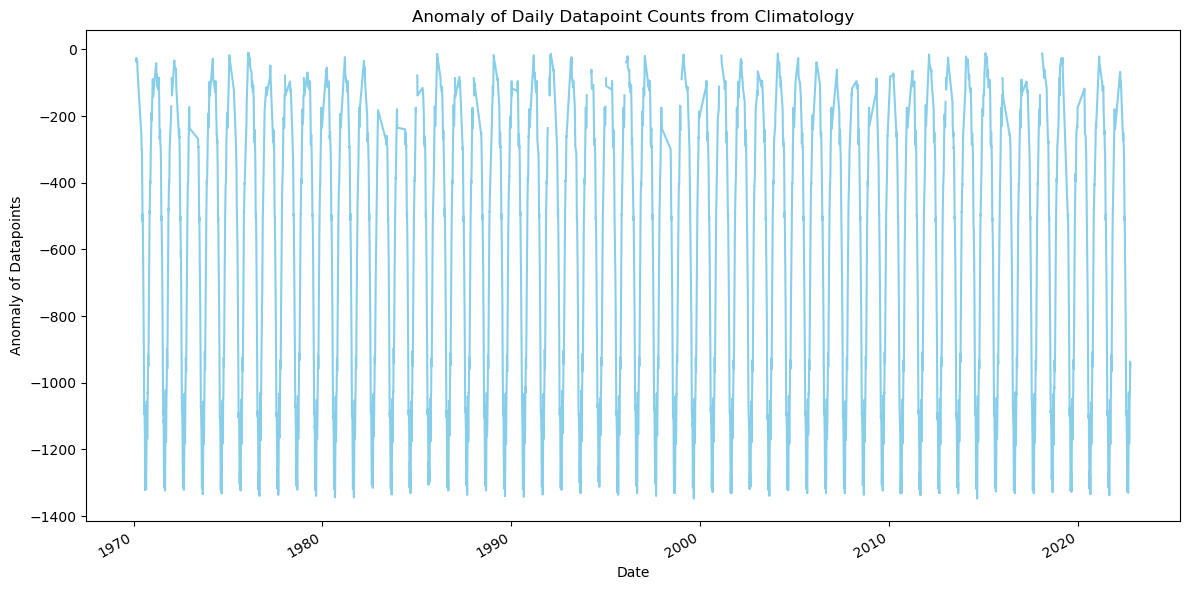

Years with significant anomalies:
ISO_TIME
1970-12-31   -150795.857143
1971-12-31   -155094.285714
1972-12-31   -150061.714286
1973-12-31   -136207.714286
1974-12-31   -150996.285714
1975-12-31   -136032.571429
1976-12-31   -138872.142857
1977-12-31   -146069.142857
1978-12-31   -149642.000000
1979-12-31   -153204.571429
1980-12-31   -149160.000000
1981-12-31   -149107.714286
1982-12-31   -146224.857143
1983-12-31   -151641.142857
1984-12-31   -153405.142857
1985-12-31   -146451.428571
1986-12-31   -153736.857143
1987-12-31   -147546.714286
1988-12-31   -144662.857143
1989-12-31   -155017.571429
1990-12-31   -159346.000000
1991-12-31   -151718.000000
1992-12-31   -148466.000000
1993-12-31   -158378.142857
1994-12-31   -148664.000000
1995-12-31   -143532.285714
1996-12-31   -153105.857143
1997-12-31   -157749.714286
1998-12-31   -139692.428571
1999-12-31   -130342.857143
2000-12-31   -139627.714286
2001-12-31   -145703.142857
2002-12-31   -145670.857143
2003-12-31   -146151.000000
2004-

In [33]:
#3.9
# Group by date and count the number of datapoints
daily_counts = filtered_df.groupby(filtered_df['ISO_TIME'].dt.date).size()

# Convert daily_counts to a DataFrame and ensure the index is a DatetimeIndex
daily_counts = daily_counts.to_frame(name='count')
daily_counts.index = pd.to_datetime(daily_counts.index)

# Extract the day of the year from the index
daily_counts.loc[:, 'DAY_OF_YEAR'] = daily_counts.index.dayofyear

# Merge the daily counts with the climatology
anomaly = daily_counts['count'] - climatology[daily_counts['DAY_OF_YEAR']].values

# Plot the anomaly
plt.figure(figsize=(12, 6))
anomaly.plot(color='skyblue')
plt.xlabel('Date')
plt.ylabel('Anomaly of Datapoints')
plt.title('Anomaly of Daily Datapoint Counts from Climatology')
plt.tight_layout()
plt.show()

# Identify years with significant anomalies
significant_years = anomaly.resample('YE').sum()
print("Years with significant anomalies:")
print(significant_years[significant_years.abs() > 100])

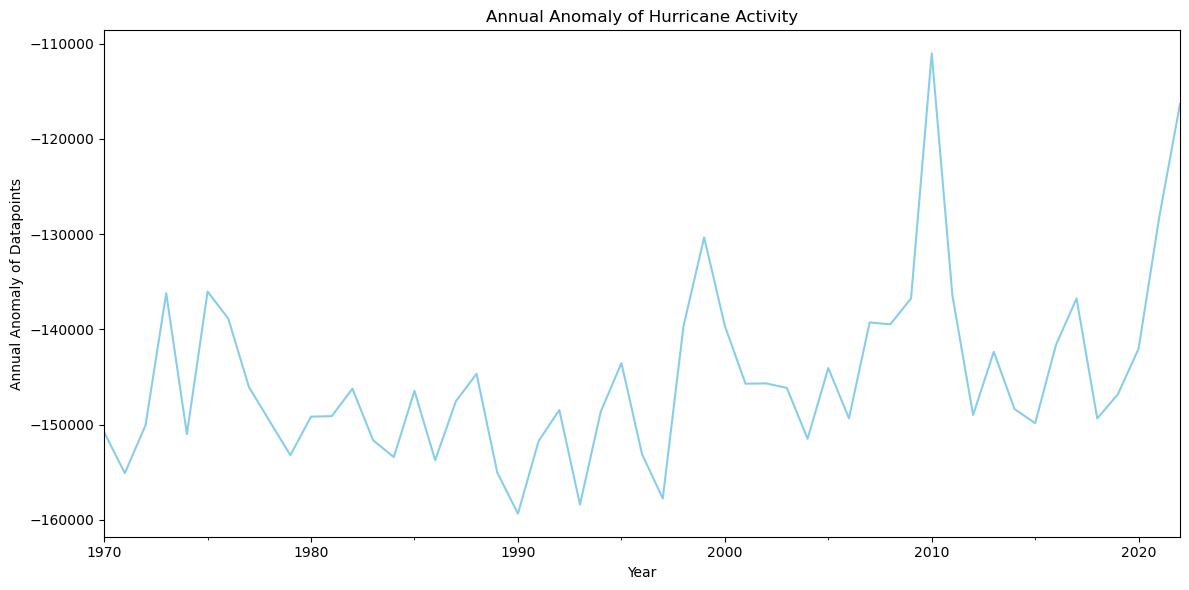

Years with significant anomalies:
ISO_TIME
1970-12-31   -150795.857143
1971-12-31   -155094.285714
1972-12-31   -150061.714286
1973-12-31   -136207.714286
1974-12-31   -150996.285714
1975-12-31   -136032.571429
1976-12-31   -138872.142857
1977-12-31   -146069.142857
1978-12-31   -149642.000000
1979-12-31   -153204.571429
1980-12-31   -149160.000000
1981-12-31   -149107.714286
1982-12-31   -146224.857143
1983-12-31   -151641.142857
1984-12-31   -153405.142857
1985-12-31   -146451.428571
1986-12-31   -153736.857143
1987-12-31   -147546.714286
1988-12-31   -144662.857143
1989-12-31   -155017.571429
1990-12-31   -159346.000000
1991-12-31   -151718.000000
1992-12-31   -148466.000000
1993-12-31   -158378.142857
1994-12-31   -148664.000000
1995-12-31   -143532.285714
1996-12-31   -153105.857143
1997-12-31   -157749.714286
1998-12-31   -139692.428571
1999-12-31   -130342.857143
2000-12-31   -139627.714286
2001-12-31   -145703.142857
2002-12-31   -145670.857143
2003-12-31   -146151.000000
2004-

In [34]:
#3.10
# Resample the anomaly to annual resolution
annual_anomaly = anomaly.resample('YE').sum()

# Plot the annual anomaly
plt.figure(figsize=(12, 6))
annual_anomaly.plot(color='skyblue')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly of Datapoints')
plt.title('Annual Anomaly of Hurricane Activity')
plt.tight_layout()
plt.show()

# Identify years with significant anomalies
significant_years = annual_anomaly[annual_anomaly.abs() > 100]
print("Years with significant anomalies:")
print(significant_years)

In [35]:
# 4
# NOTE: 没有找到第四题？